

# DATA SCIENCE CERTIFICATE
# DATA 205 - Capstone Experience in Data Science
# Montgomery College
# Fall 2020


SALIFOU SYLLA

DECEMBER 16, 2020

# Predicting Car Crashes in Montgomery County: <br>Can Machine Learning Help Us Understand What Factors Lead to Car Crashes?

The dataset used is Crash Reporting Data set. Those datasets are about car crashes that have occurred in the Montgomery County, they provide information about the driver, the incident, and the non-motorist. They are from https://www.montgomerycountymd.gov/. The dataMontgomery program seeks to provide residents and constituents with direct access to County datasets in consumable formats, so they may be viewed, sorted and used in various ways, including being potentially leveraged in the development of new applications and services by interested parties. Providing this information offers the public an opportunity to review and analyze raw data, and the opportunity to use it for a variety of purposes. The following are those three datasets:
1.	Crash Reporting - Incidents Data:
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf
2.	Crash Reporting - Drivers Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632
3.	Crash Reporting - Non-Motorists Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fkdce5


## Importing Libraries

In [22]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
#from pyproj import Proj, transform
from datetime import datetime
from datetime import date, time
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


## Loading web data file to pandas dataframe
Since dataMontgomery updates its datasets frequently, then we are
reading data from the dataMontgomery url each time in the code. 

### Loading the first dataset (Incidents Data)

In [69]:
url = "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD"
incidentsData = pd.read_csv(url)
#incidentsData.info()

C:\Users\sonko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
# remove spaces in columns name
incidentsData.columns = incidentsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
#incidentsData.info()

In [71]:
incidentsData.shape

(66648, 44)

In [26]:
#incidentsData.isnull().sum()

### Loading the second dataset (Drivers Data)

In [27]:
url = "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD"
driversData = pd.read_csv(url)
#driversData.info()

In [28]:
# remove spaces in columns name
driversData.columns = driversData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
#driversData.info()

In [29]:
driversData.shape

(118300, 43)

In [30]:
#driversData.isnull().sum()

### Loading the third dataset (Non-Motorists Data)

In [31]:
url = "https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD"
nonMotoristsData = pd.read_csv(url)
#nonMotoristsData.info()

In [32]:
# remove spaces in columns name
nonMotoristsData.columns = nonMotoristsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
#nonMotoristsData.info()

In [33]:
nonMotoristsData.shape

(3849, 32)

In [34]:
#nonMotoristsData.isnull().sum()

# Exploratory Data Analysis

Dataset containts different informations about the accients ocurred in the Montgomery County from 2015 to 2020. The main goal is to extract some insights that can be useful to reduce the number of accidents in the County.

## Combining DataFrames with Pandas
pandas.concat() function concatenates the two DataFrames and returns a new dataframe with the new columns as well. The dataframe row that has no value for the column will be filled with NaN


In [35]:
# First concatenate incidents Data with drivers Data
concat1 = pd.concat([incidentsData, driversData])

# Then concatenate the result of the first concat with Non-Motorists Data
df = pd.concat([concat1, nonMotoristsData])

## Describe the dataset

In [36]:
#The shape attribute tells us a number of observations and variables we have in the data set.
df.shape

(188797, 72)

In [334]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
#df.info()

### The main features of the dataset are:

**report_number:** ACRS Report Number assigned to the incident.                 
local_case_number: Case number from the local investigating agency for the incident.<br>
agency_name: Name of the investigating agency.<br>
**acrs_report_type:** Identifies crash as property, injury, or fatal.<br>
**crash_date_time:** Date and Time of crash.<br>
**hit_run:** Unit-Vehicle left the scene resulting in a hit and run event.<br>
**route_type:** Type of roadway at crash location.<br>
mile_point: Location - Mile point.<br>
mile_point_direction: Location - Mile point direction.<br>
lane_direction: Road/Area - Lane direction of travel.<br>
lane_number: Road/Area - Lane number of where the event occurred on.<br>
**lane_type:** Road/Area - Type of roadway/area lane.<br>
**number_of_lanes:** Road/Area - Number of lanes.<br>
**direction:** Location - Direction from mile point.<br>
**distance:** Location - Distance from mile point.<br>
distance_unit: Location - Unit of measurement for mile point distance.<br>
**road_grade:** Road/Area - Roadway grade.<br>
**nontraffic:** Location - Recorded as a Non-Traffic event.<br>
**road_name:** Name of road.<br>
cross_street_type: Roadway type for nearest cross-street.<br>
cross_street_name: Name of nearest cross-street.<br>
**off_road_description:** Description of location for off-road collisions.<br>
**municipality:** Jurisdiction for crash location.<br>
**related_non_motorist:** Type(s) of non-motorist involved.<br>
**at_fault:**  Fault by a driver or non-motorist.<br>
**collision_type:** Type of collision.<br>
**weather:** Weather at collision location.<br>
**surface_condition:** Condition of roadway surface.<br>
**light:** Lighting conditions.<br>
**traffic_control:** Signage or traffic control devices.<br>
**driver_substance_abuse:** Substance abuse detected for all drivers involved.<br>
**non_motorist_substance_abuse:** Substance abuse detected for all non-motorists involved.<br>
first_harmful_event: The first event of the collision.<br>
second_harmful_event: The second event of the collision (if applicable).<br>
fixed_oject_struck: The fixed object struck by vehicle (if applicable).<br>
**junction:** The type of junction where the collision occurred.<br>
**intersection_type:** If the collision was intersection related, this field describes the intersection characteristics.<br>
**intersection_area:** Road/Area-Describes the interchange type, such as it being a thru roadway, ramp, or other related area types.<br>
road_alignment: The road alignment where the collision occurred.<br>
**road_condition:** The condition of the road when the collision occurred.<br>
road_division: The road division where the collision occurred.<br>
**latitude:** Y coordinate of crash location.<br>
**longitude:** X coordinate of crash location.<br>
**location:**

## Data Visualization
Places data in a visual context so patterns, trends and correlations that might not otherwise be detected can be exposed. 

In [37]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        plot_name.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90) 
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 3:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
            label.set_rotation(20)        
        


### Municipalities
Jurisdiction for crash location.

In [38]:
# Municipality names
municipality_names = df['municipality'].value_counts().index
municipality_names

Index(['ROCKVILLE', 'GAITHERSBURG', 'TAKOMA PARK', 'KENSINGTON',
       'CHEVY CHASE #4', 'CHEVY CHASE #3', 'FRIENDSHIP HEIGHTS', 'POOLESVILLE',
       'CHEVY CHASE VILLAGE', 'CHEVY CHASE #5', 'CHEVY CHASE VIEW', 'SOMERSET',
       'GARRETT PARK', 'WASHINGTON GROVE', 'GLEN ECHO', 'MATINS ADDITION',
       'NORTH CHEVY CHASE', 'LAYTONSVILLE', 'BROOKEVILLE', 'DRUMMOND'],
      dtype='object')

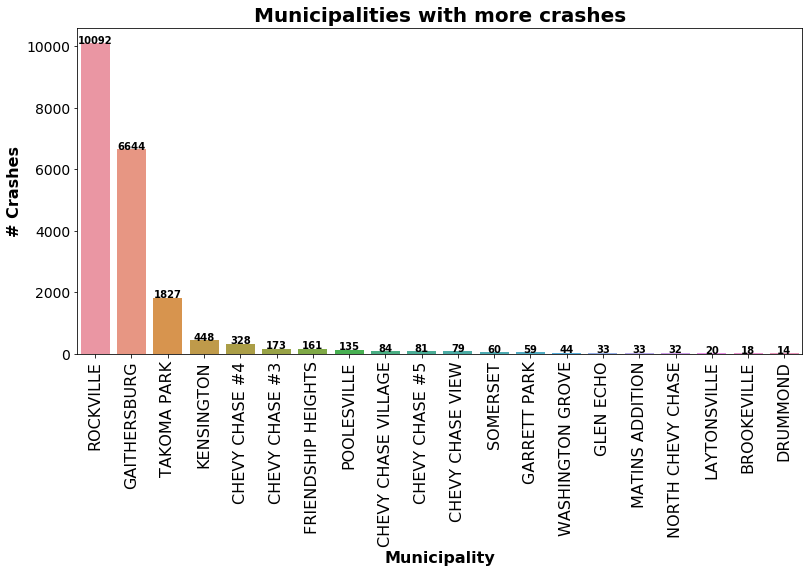

In [39]:
# Visualization
plt.figure(figsize=(13,6))
x = df['municipality'].value_counts().index
y = df['municipality'].value_counts()
ax = sns.barplot(x=x, y=y)
plt.title("Municipalities with more crashes", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Crashes', fontsize=16).set_weight('bold')
ax.set_xlabel('Municipality', fontsize=16).set_weight('bold')
tick_format(ax,1)


### Body type of the vehicle involved in the crash

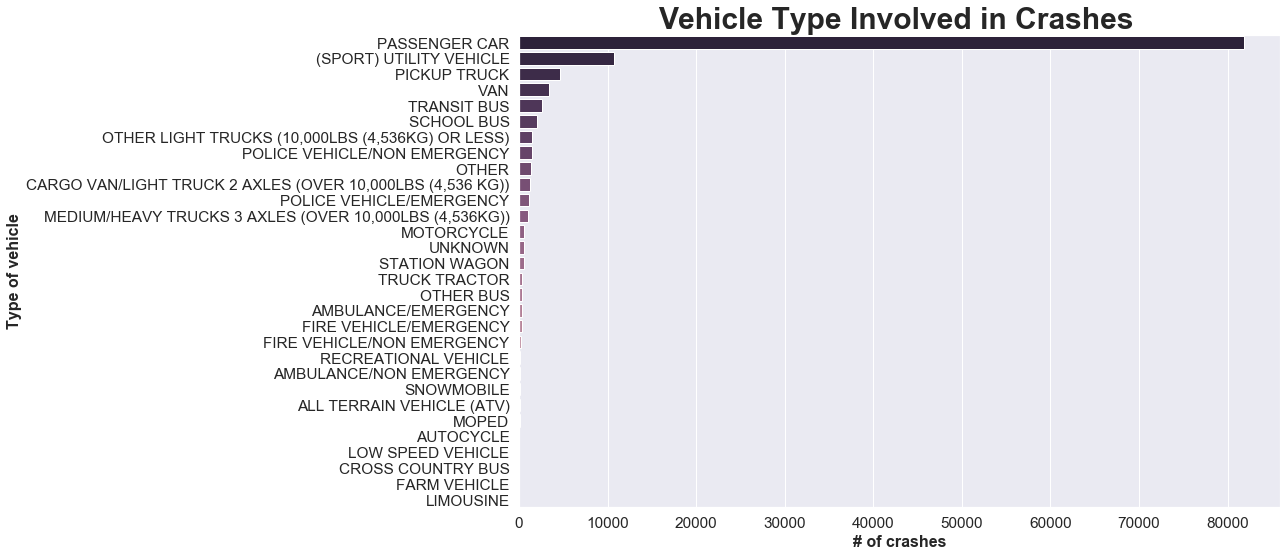

In [52]:
typeofvehicle = df['vehicle_body_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofvehicle, 
                 y=typeofvehicle.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Vehicle Type Involved in Crashes ", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type of vehicle', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of crashes', fontsize=16).set_weight('bold')

### Non-Motorists involvment in the crash


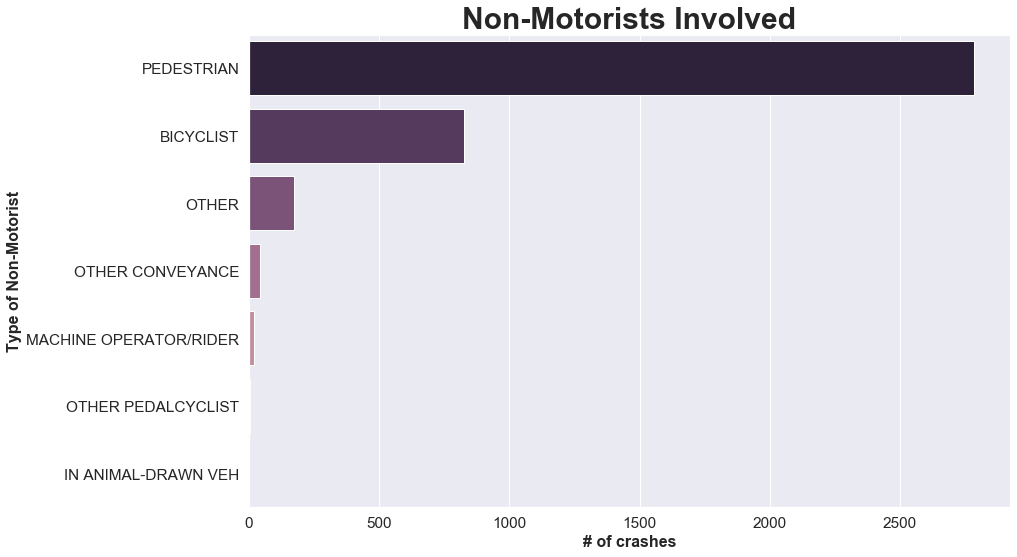

In [53]:
typeofpedestrian = df['pedestrian_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofpedestrian, 
                 y=typeofpedestrian.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofpedestrian.index)),
                 ax=ax1)
plt.title("Non-Motorists Involved", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type of Non-Motorist', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of crashes', fontsize=16).set_weight('bold')


### Condition of roadway surface.

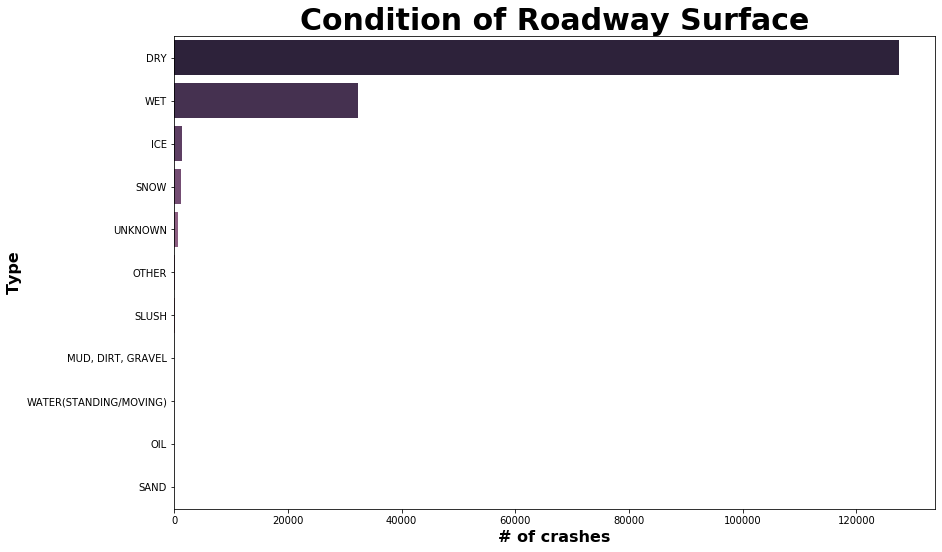

In [42]:
roadway_surface = df['surface_condition'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=roadway_surface, 
                 y=roadway_surface.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(roadway_surface.index)),
                 ax=ax1)
plt.title("Condition of Roadway Surface", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of crashes', fontsize=16).set_weight('bold')

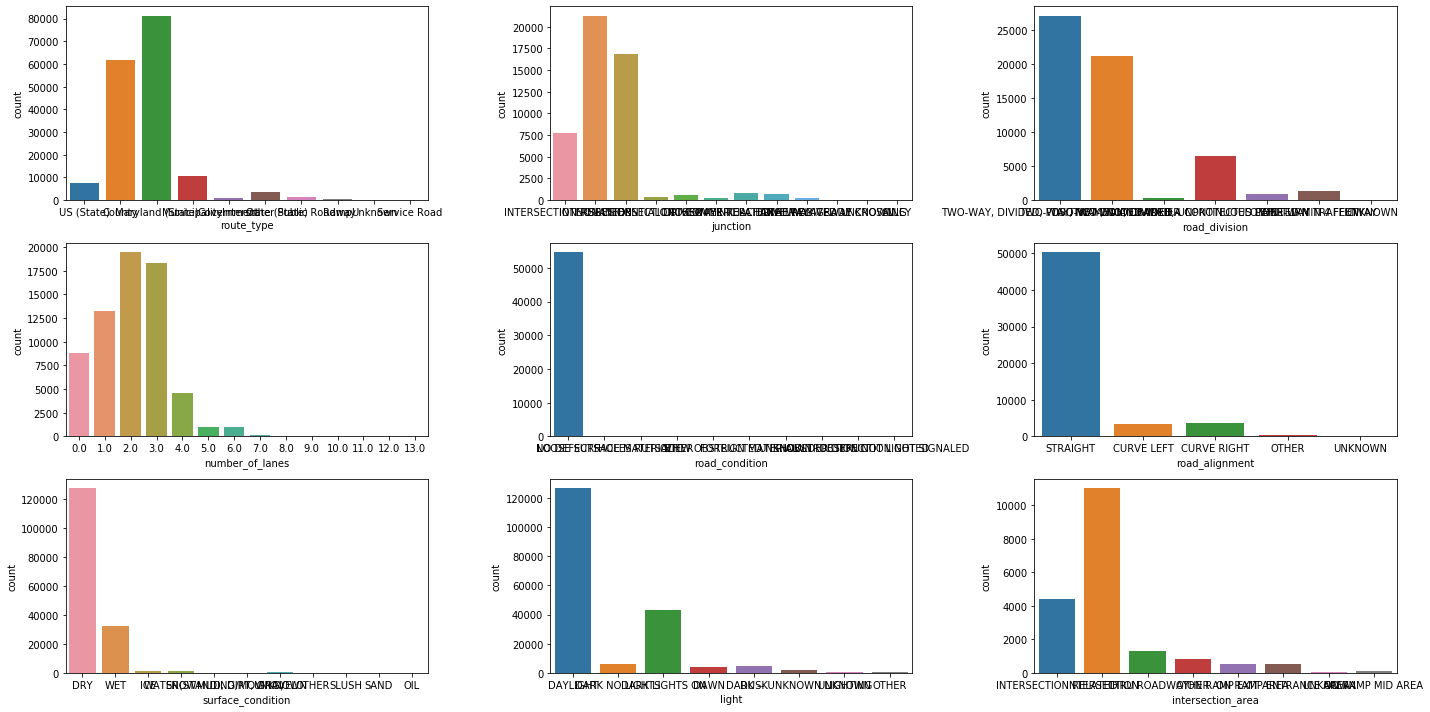

In [43]:
fig, ax = plt.subplots(3, 3, figsize = (20, 10));

sns.countplot(x='route_type',data=df, ax=ax[0,0])
sns.countplot(x="junction",data=df,  ax=ax[0,1])
sns.countplot(x='road_division',data=df, ax=ax[0,2])
sns.countplot(x='number_of_lanes',data=df, ax=ax[1,0])
sns.countplot(x='road_condition',data=df, ax=ax[1,1])
sns.countplot(x='road_alignment',data=df,  ax=ax[1,2])
sns.countplot(x='surface_condition',data=df, ax=ax[2,0])
sns.countplot(x='light',data=df, ax=ax[2,1])
sns.countplot(x='intersection_area',data=df, ax=ax[2,2])

plt.tight_layout()

### Splitting the column  crash_date_time 
The column “crash_date_time”(Date and Time of crash.) is split in 5 columns: Day, Month, Year, 
Hour and Dayofweek 


In [44]:
# Create new columns
#convert the column to datetime first using
import datetime as dt

df['DateTime'] = pd.to_datetime(df['crash_date_time'])
#df['Date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
df['Day'] = df['DateTime'].dt.strftime('%d')
df['Month'] = df['DateTime'].dt.strftime('%m')
df['Year'] = df['DateTime'].dt.strftime('%Y')
#df['Time'] = df['DateTime'].dt.strftime('%H:%M')
df['Hour'] = df['DateTime'].dt.strftime('%H')
df['Dayofweek'] = df['DateTime'].dt.day_name()


In [45]:
start_year = df.Year.min()
end_year = df.Year.max()

# A count of the number of fatal casualties associated with crashes.
fatal = (df['acrs_report_type'].values == 'Fatal Crash').sum()

injury = (df['acrs_report_type'].values == 'Injury Crash').sum()

propertyDamage = (df['acrs_report_type'].values == 'Property Damage Crash').sum()

print("The total death in car crash crashes since the year {}, up to {} is {}.".format(start_year, end_year,fatal))
print("While the total number of injuries and properties damage in car accidents reach {}, {} respectively".format(injury,propertyDamage))

The total death in car crash crashes since the year 2015, up to 2020 is 531.
While the total number of injuries and properties damage in car accidents reach 71506, 116760 respectively


In [55]:
df['acrs_report_type'].value_counts()

Property Damage Crash    116760
Injury Crash              71506
Fatal Crash                 531
Name: acrs_report_type, dtype: int64

### Type of Crash
acrs_report_type: Identifies crash as **property, injury, or fatal.**

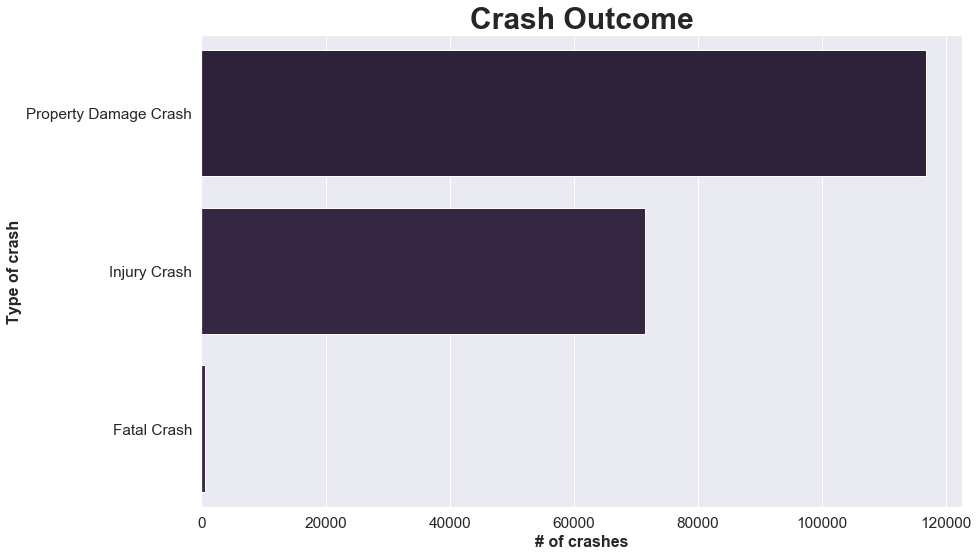

In [54]:
crashIdentificaton = df['acrs_report_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=crashIdentificaton, 
                 y=crashIdentificaton.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Crash Outcome", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type of crash', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of crashes', fontsize=16).set_weight('bold')

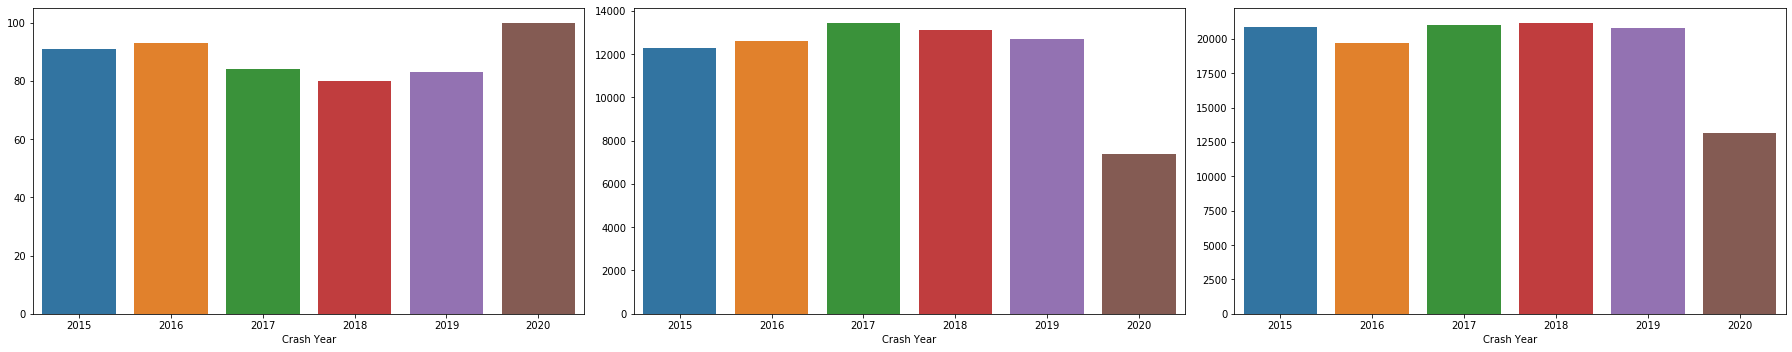

In [47]:
fig, ax = plt.subplots(1, 3, figsize = (25, 5));

                              
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Fatal Crash'].tolist(), ax=ax[0]);
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Injury Crash'].tolist(), ax=ax[1]);
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Property Damage Crash'].tolist(), ax=ax[2]);
[ax[i].set_xlabel('Crash Year') for i in range(3)]
plt.tight_layout()

### Fatalities per year

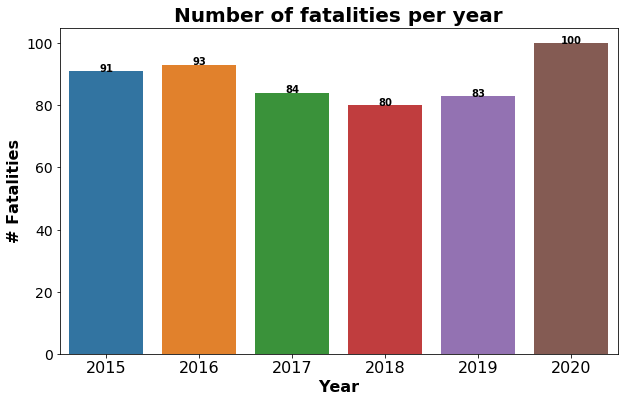

In [48]:
# Visualize Number of Fatalities per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Fatal Crash'].tolist())
plt.title("Number of fatalities per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Fatalities', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

### Crashes Per Year

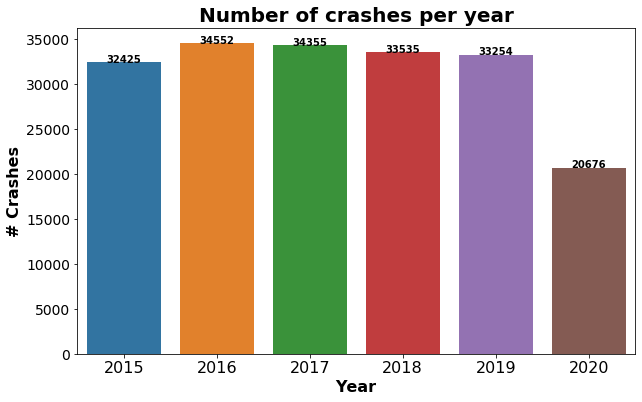

In [49]:
# Visualize Number of Incidents per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts())
plt.title("Number of crashes per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Crashes', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

### Crashes Per Day of Week Per Hour

Text(0.5, 1, 'Crashes per day of week per hour')

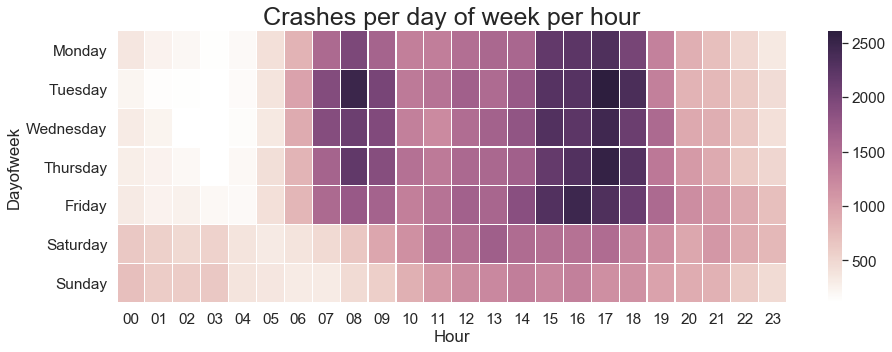

In [50]:
# Visualize Accidents per day of week per hour
sns.set(font_scale=1.4)
heat_data=df.groupby(['Dayofweek', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Crashes per day of week per hour', fontsize=25)

### Crashes Per Month Of Year Per Hour

Text(0.5, 1, 'Crashes per month of year per hour')

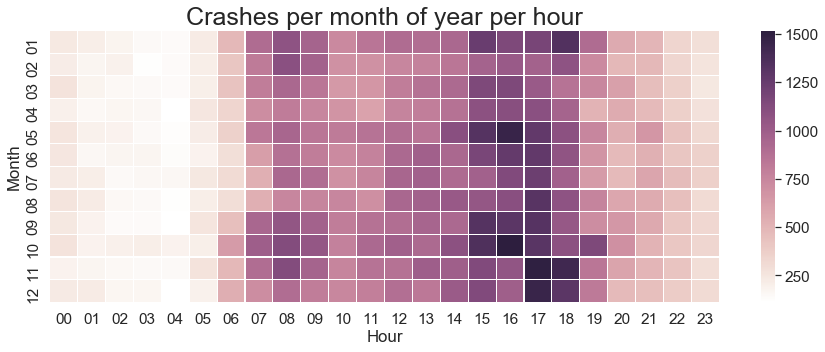

In [51]:
# Visualize Crashes per month of year per hour
sns.set(font_scale=1.4)
heat_data=df.groupby(['Month', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Crashes per month of year per hour', fontsize=25)

Most of crashes occur during the workweek between 3:00 and 6:00 PM. 

# CLEANING DATA
Before we start to draw conclusions using our data, we are going to clean it. The first cleaning step consists of dropping unnecessary columns to simplify the dataframe.

As we can observe, the dataframe contains xx columns. We can easily print a list with column names using the **pandas.DataFrame.columns** method. Additionally, the **pandas.DataFrame.info** method provides information about a DataFrame including column types, non-null values and memory usage.

As we can see, all columns  contain null values. Since we do not need to take into consideration the null values. 
Before we start to draw conclusions using our data, we are going to clean it. The first cleaning step consists of dropping unnecessary columns to simplify the dataframe.

## Incidents Data

In [72]:
# Drop unnecessary columns.
incidentsData.drop(['local_case_number', 'agency_name', 'off_road_description', 'municipality', 'lane_type', 'related_non_motorist', 'fixed_oject_struck', 'number_of_lanes', 'distance', 'distance_unit', 'intersection_area', 'non_motorist_substance_abuse',  'second_harmful_event', 'location', 'latitude', 'longitude', 'report_number'  ], axis=1 ,inplace=True)
# Columns after dropping.
#incidentsData.columns

In [60]:
#incidentsData.info()

In [73]:
incidentsData.dropna(inplace=True)
#print(incidentsData)

In [74]:
incidentsData.shape

(21603, 27)

In [336]:
#incidentsData.info()

In [83]:
incidentsData.columns

Index(['acrs_report_type', 'crash_date_time', 'hit_run', 'route_type',
       'lane_number', 'direction', 'distance_unit', 'road_grade', 'at_fault',
       'collision_type', 'weather', 'surface_condition', 'light',
       'traffic_control', 'driver_substance_abuse', 'junction',
       'intersection_type', 'road_alignment', 'road_condition',
       'road_division'],
      dtype='object')

## Driver Data

In [344]:
# Drop unnecessary columns.
driversData.drop(['report_number', 'local_case_number', 'agency_name', 'road_name', 
       'cross_street_name', 'off_road_description', 'municipality', 'related_non_motorist', 
       'non_motorist_substance_abuse', 'person_id', 'circumstance', 'drivers_license_state',
       'vehicle_id', 'vehicle_year', 'vehicle_make', 'equipment_problems', 'latitude', 'longitude', 'location'], axis=1 ,inplace=True)
# Columns after dropping.
#driversData.columns

In [337]:
#driversData.info()

In [345]:
driversData.dropna(inplace=True)
#print(driversData)

In [346]:
driversData.shape

(69045, 24)

## Non Motorist Data

In [53]:
# Drop unnecessary columns.
nonMotoristsData.drop(['report_number', 'local_case_number', 'agency_name', 'road_name', 'cross_street_name', 'off_road_description', 'municipality', 'latitude', 'longitude', 'location'], axis=1 ,inplace=True)
# Columns after dropping.
#nonMotoristsData.columns

In [251]:
#nonMotoristsData.info()

In [54]:
nonMotoristsData.dropna(inplace=True)
#print(nonMotoristsData)

In [55]:
nonMotoristsData.shape

(1001, 22)

# Machine Learning Model to Predict Car Crash Fatality

Supervised learning describes a class of problem that involves using a model to learn a mapping between input examples and the target variable. There are two main types of supervised learning problems: they are classification that involves predicting a class label and regression that involves predicting a numerical value. We can approach the modeling part of this problem in different ways. We will approach it as a **classification problem.** We will take it as **multi-class classification** problem and predict the outcome of a crash as fataly , Injury or Property Damage. We need to classify the dependent variable that has three classes. In seeing the training dataset, the model learns patterns specific to each class and uses those patterns to predict the membership of future data. We opt for **Decsion Tree**, a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

* Category 0: Fatal (n= 518)

* Category 1: Injury  (n=70925)

* Category 2: Property Damage (n=115644)

## Multi-class Classification Assumptions
* Multi-class classification  requires the dependent variable should be measured at the nominal level.<br>
    Nominal variable include **acrs_report_type** with three categories: Fatal Crash, Injury Crash and Property Damage Crash.
* A sample can only have one class    
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* It requires quite large sample sizes.


## Feature Selection Methods
**Feature selection methods** are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.**Filter Method:** Select subsets of features based on their relationship with the target.


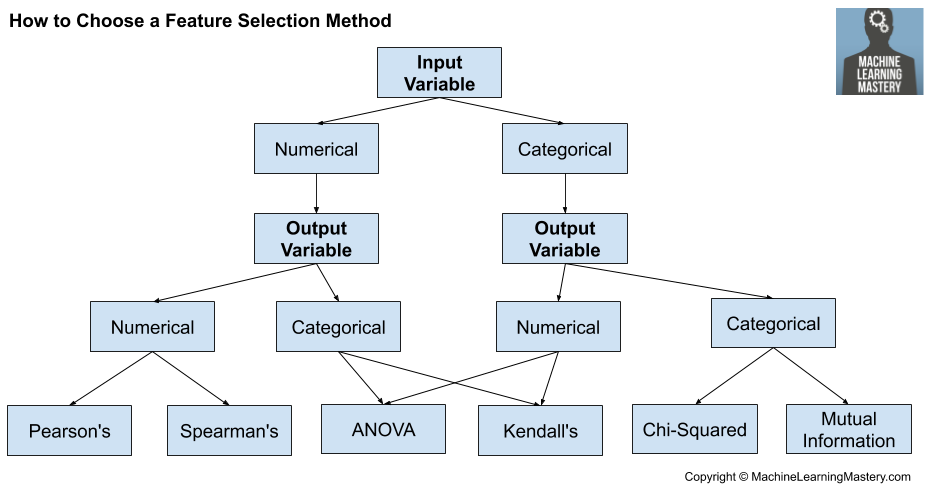

# Incidents Data 

###  Feature Selection Using Mutual Information
It calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain. In other words, it basically measures the dependency of features with the target value. The higher score means more dependent variables.

In [347]:
#load all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

import scipy as scp
import sklearn


from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
import matplotlib.pyplot as plt



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot


import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier

In the step of data processing in machine learning, we often need to prepare our data in specific ways before feeding into a machine learning model. Machine learning models require all input and output variables to be numeric. This means that if our data contains categorical data, we must encode it to numbers before we can fit and evaluate a model.

#### Label Encoding
This approach is very simple and it involves converting each value in a column to a number. This approach requires the category column to be of ‘category’ datatype.

In [75]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in incidentsData:
    if incidentsData[i].dtype == 'object':
        lblE.fit(incidentsData[i])
        incidentsData[i] = lblE.transform(incidentsData[i])
incidentsData

,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,lane_direction,lane_number,direction,road_grade,...,surface_condition,light,traffic_control,driver_substance_abuse,first_harmful_event,junction,intersection_type,road_alignment,road_condition,road_division
5,2,8793,0,3,9.730,1,2,2,1,4,...,0,4,6,36,14,4,4,3,3,2
7,2,9067,0,3,0.860,1,2,1,1,2,...,0,4,1,32,14,5,1,3,3,4
11,1,8148,0,0,5.300,1,2,3,1,4,...,0,4,6,36,14,4,1,3,3,2
12,2,2251,0,0,1.420,3,0,1,3,2,...,0,4,6,32,14,4,1,3,3,4
16,1,15134,0,3,7.570,0,1,0,0,4,...,0,4,9,36,14,4,1,3,3,2
17,2,19236,0,3,1.620,1,1,3,1,4,...,0,4,6,36,14,4,1,3,3,4
21,2,6806,1,3,3.360,1,1,0,1,4,...,10,1,6,6,5,4,1,3,3,2
22,2,4867,0,0,0.000,0,0,1,0,4,...,0,4,6,36,14,4,1,3,3,4
24,1,7524,0,0,3.462,0,4,1,0,1,...,0,3,6,6,5,4,4,3,3,2
29,2,10562,0,0,6.020,0,0,2,0,4,...,0,4,6,36,14,4,4,3,3,2


Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’.

In [76]:
# One Hot Encoding
incidentsData = pd.get_dummies(incidentsData)
incidentsData

,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,lane_direction,lane_number,direction,road_grade,...,surface_condition,light,traffic_control,driver_substance_abuse,first_harmful_event,junction,intersection_type,road_alignment,road_condition,road_division
5,2,8793,0,3,9.730,1,2,2,1,4,...,0,4,6,36,14,4,4,3,3,2
7,2,9067,0,3,0.860,1,2,1,1,2,...,0,4,1,32,14,5,1,3,3,4
11,1,8148,0,0,5.300,1,2,3,1,4,...,0,4,6,36,14,4,1,3,3,2
12,2,2251,0,0,1.420,3,0,1,3,2,...,0,4,6,32,14,4,1,3,3,4
16,1,15134,0,3,7.570,0,1,0,0,4,...,0,4,9,36,14,4,1,3,3,2
17,2,19236,0,3,1.620,1,1,3,1,4,...,0,4,6,36,14,4,1,3,3,4
21,2,6806,1,3,3.360,1,1,0,1,4,...,10,1,6,6,5,4,1,3,3,2
22,2,4867,0,0,0.000,0,0,1,0,4,...,0,4,6,36,14,4,1,3,3,4
24,1,7524,0,0,3.462,0,4,1,0,1,...,0,3,6,6,5,4,4,3,3,2
29,2,10562,0,0,6.020,0,0,2,0,4,...,0,4,6,36,14,4,4,3,3,2


By default, the **get_dummies()** does not do dummy encoding, but One-Hot encoding.

Let's now select the best features in the dataset using different methods.

In [77]:
num_features = 15

In [78]:
Data1 = incidentsData.drop(columns = 'acrs_report_type').values
target1 = incidentsData['acrs_report_type']


In [312]:
from sklearn.feature_selection import mutual_info_classif

fs_fit_fscore = fs.SelectKBest(fs.mutual_info_classif, k=num_features)

fs_fit_fscore.fit_transform(Data1, target1)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([20, 14, 19, 13,  1, 22, 15, 23,  3, 17, 12,  8, 18, 10,  4],
      dtype=int64)

Let's see what these 15 best features are.

In [313]:
best_features_fscore = incidentsData.columns[fs_indices_fscore].values
best_features_fscore

array(['driver_substance_abuse', 'at_fault', 'traffic_control',
       'cross_street_name', 'crash_date_time', 'junction',
       'collision_type', 'intersection_type', 'route_type',
       'surface_condition', 'cross_street_type', 'direction', 'light',
       'nontraffic', 'mile_point'], dtype=object)

Based on the Scores, we observe that, out of the top 33 features, these 12 are the most important features. 

The FScore importances of these features are given below.

In [314]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([0.05163862, 0.02048879, 0.01729481, 0.01294227, 0.0100357 ,
       0.00684074, 0.00637664, 0.00593933, 0.00493846, 0.00397364,
       0.00348804, 0.00316386, 0.0030695 , 0.002406  , 0.00205727])

We define a function for plotting so that we can plot other importance types as well corresponding to different feature selection methods.

In [315]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

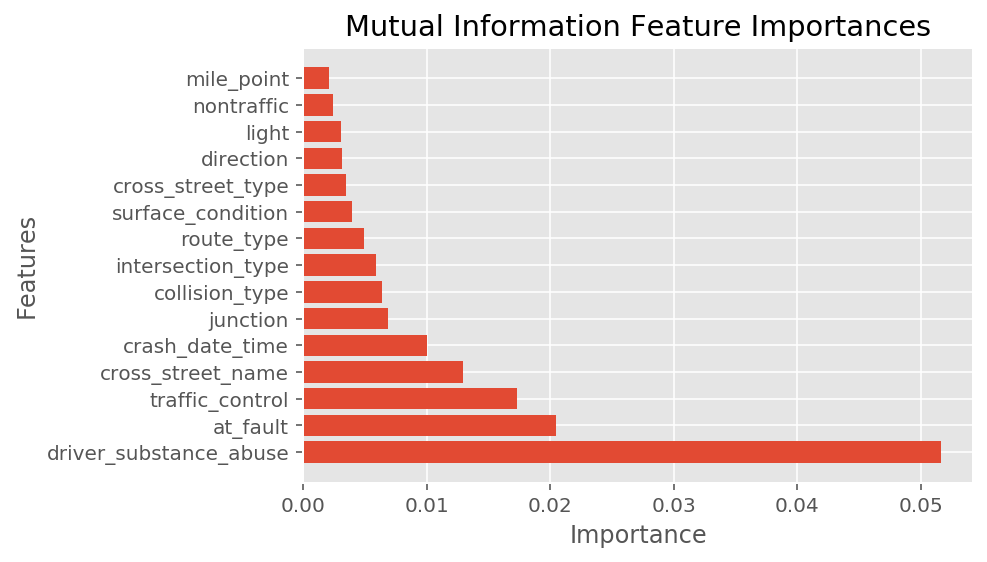

In [325]:
plot_imp(best_features_fscore, feature_importances_fscore, 'Mutual Information')

##  Multi Class Classification By Decison Tree
**Decision Tree** is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node.

Now we will import the Decision Tree Classifier for building the model. For that **scikit learn** is used in Python.

In [317]:
#split dataset in features and target variable
feature_cols = ['driver_substance_abuse', 'at_fault', 'traffic_control',
       'cross_street_name', 'crash_date_time', 'junction',
       'collision_type', 'intersection_type', 'route_type',
       'surface_condition', 'cross_street_type', 'direction', 'light',
       'nontraffic', 'mile_point']
Data1 = incidentsData[feature_cols] # Features
target1 = incidentsData.acrs_report_type # Target variable



In [318]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Data1, target1, test_size=0.3, random_state=1) # 70% training and 30% test

In [319]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Now that we have fitted the training data to a Decision Tree Classifier, it is time to predict the output of the test data.

In [320]:
predictions = dtree.predict(X_test)

Now the final step is to evaluate our model and see how well the model is performing. For that we use metrics such as **confusion matrix, precision** and **recall.**

#### Classification Report

In [321]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.14      0.11      0.12        19
           1       0.47      0.48      0.48      2784
           2       0.60      0.59      0.60      3678

    accuracy                           0.55      6481
   macro avg       0.41      0.39      0.40      6481
weighted avg       0.55      0.55      0.55      6481



**Precision** score means the the level up-to which the prediction made by the model is precise. **Recall** is the amount up-to which the model can predict the outcome. **F1** and **Support** scores are the amount of data tested for the predictions.


#### Confusion Matrix

In [322]:
print(confusion_matrix(y_test,predictions))  

[[   2    8    9]
 [   4 1349 1431]
 [   8 1484 2186]]


**Confusion matrix** is a table which describes the performance of a prediction model. A confusion matrix contains the actual values and predicted values. we can use these values to calculate the accuracy score of the model.

In [323]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.545749112791236


Now the model building is over but we did not see the tree yet. Now scikit learn has a built-in library for visualization of a tree but we do not use it often. For visualization, we need to install the pydot library and run the following code.

#### Visualizing Decision Trees

Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, we also need to install graphviz and pydotplus.

In [194]:
!pip install graphviz
!pip install pydotplus
!pip install --upgrade scikit-learn==0.22
from six import StringIO

Requirement already up-to-date: scikit-learn==0.22 in c:\users\salifou sylla\anaconda3\lib\site-packages (0.22)


export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

#### Print Text Representation

In [212]:
from sklearn import tree
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_8 <= 16.50
|   |--- feature_2 <= 37.50
|   |   |--- feature_8 <= 4.50
|   |   |   |--- feature_8 <= 1.50
|   |   |   |   |--- feature_1 <= 20323.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  20323.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  1.50
|   |   |   |   |--- feature_12 <= 39.24
|   |   |   |   |   |--- feature_3 <= -76.97
|   |   |   |   |   |   |--- feature_12 <= 38.98
|   |   |   |   |   |   |   |--- feature_1 <= 13924.00
|   |   |   |   |   |   |   |   |--- feature_3 <= -77.05
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_3 >  -77.05
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  13924.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_12 >  38.98
|   |   |   |   |   |   |   |--- feature_1 <= 14334.00
|   |   |   |   |   |   |   |   |--- feature_6 <= 5.50
|   |   |   |   |   |   |   |

# Drivers Data

### Feature Selection Using F-Score
The F-Score method is a filter feature selection method that looks at the relationship between each descriptive feature and the target feature using the F-distribution. The code below returns the indices of the XX features that have the highest F-Score value sorted from the highest to the lowest. Pay attention that the wrapper is not used in any way when selecting features using the F-Score method. In some cases, the F-Score will be "NaN" for some features due to technical reasons (related to the nature of the F-distribution). For this reason, we will convert any "NaN" value to zero for a correct result via the np.nan_to_num() method.

In [349]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in driversData:
    if driversData[i].dtype == 'object':
        lblE.fit(driversData[i])
        driversData[i] = lblE.transform(driversData[i])

In [350]:
# One Hot Encoding
driversData = pd.get_dummies(driversData)

In [324]:
#driversData

In [351]:

Data2 = driversData.drop(columns = 'acrs_report_type').values
target2 = driversData['acrs_report_type']

In [352]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data2, target2)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([10, 12, 14, 13, 11, 19,  7,  3, 15,  6,  9, 16,  2, 20,  0],
      dtype=int64)

In [353]:
best_features_fscore = driversData.columns[fs_indices_fscore].values
best_features_fscore

array(['driver_at_fault', 'driver_distracted_by',
       'vehicle_first_impact_location', 'vehicle_damage_extent',
       'injury_severity', 'vehicle_going_dir', 'light',
       'cross_street_type', 'vehicle_second_impact_location',
       'surface_condition', 'driver_substance_abuse', 'vehicle_body_type',
       'route_type', 'speed_limit', 'acrs_report_type'], dtype=object)

In [354]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([1.52869341e+04, 6.95932035e+02, 2.90281788e+02, 2.74627469e+02,
       2.03854093e+02, 1.87347517e+02, 1.35219314e+02, 1.03027412e+02,
       9.28372045e+01, 5.12916798e+01, 4.65870498e+01, 1.75794856e+01,
       7.61304368e+00, 6.41108187e+00, 6.10442571e+00])

In [355]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

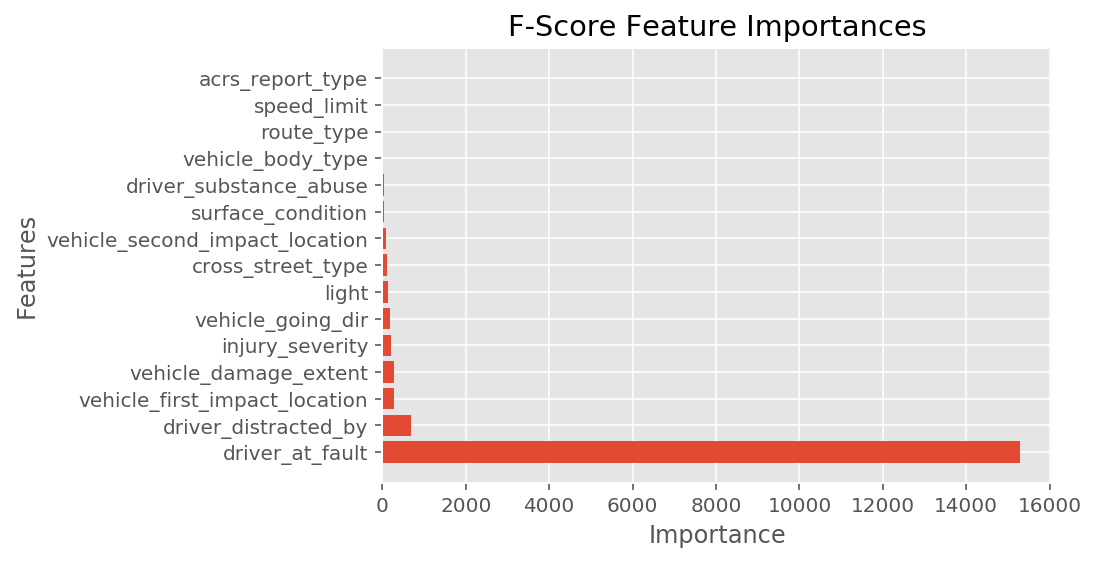

In [356]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

### Multi Class Classification By Random Forest


In [357]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(Data2, target2, test_size = 0.25, random_state = 21)

#### Training the model


We define the parameters for the random forest training as follows:

* n_estimators: This is the number of trees in the random forest classification. We have defined 10 trees in our random forest.
* criterion: This is the loss function used to measure the quality of the split. There are two available options in sklearn — gini and entropy. We have used entropy.
* random_state: This is the seed used by the random state generator for randomizing the dataset. <br>
Next, we use the training dataset (both dependent and independent to train the random forest)

In [358]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Evaluating the performance
Performance evaluation of the trained model consists of following steps:

1. Predicting the crash class of the test data using test feature set (X_test). We will use the predict function of the random forest classifier to predict classes.
2. Converting the numeric classes of the predicted values and the test actual values into textual equivalent. This involves the following steps:
     1. Creating dictionary for mapping tables from class to text — we use dict function along with zip to create the required dictionary.
     2. Transforming the test-actual and test-predict database from numeric classes to textual classes.
     3. Evaluating the performance of the classifier using Confusion Matrix.

In [359]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Crashes'], colnames=['Predicted Crashes']))
print()

Predicted Crashes   0     1     2
Actual Crashes                   
0                  11    20    12
1                   0  4710  2415
2                   0  1364  8730



In [360]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41        43
           1       0.77      0.66      0.71      7125
           2       0.78      0.86      0.82     10094

    accuracy                           0.78     17262
   macro avg       0.85      0.59      0.65     17262
weighted avg       0.78      0.78      0.78     17262



In [361]:

print(confusion_matrix(y_test,y_pred))  

[[  11   20   12]
 [   0 4710 2415]
 [   0 1364 8730]]


In [362]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7792260456494033


# Non Motorists Data 

### Multi Class Classification using Random Forest

### Feature Selection 
The random forest importance (RFI) method is a filter feature selection method that uses the total decrease in node impurities from splitting on a particular feature as averaged over all decision trees in the ensemble. For classification, the node impurity is measured by the Gini index and for regression, it is measured by residual sum of squares. Let's perform RFI feature selection using 100 trees.

In [60]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in nonMotoristsData:
    if nonMotoristsData[i].dtype == 'object':
        lblE.fit(nonMotoristsData[i])
        nonMotoristsData[i] = lblE.transform(nonMotoristsData[i])


In [61]:
# One Hot Encoding
nonMotoristsData = pd.get_dummies(nonMotoristsData)

In [154]:
#nonMotoristsData

In [62]:
Data3 = nonMotoristsData.drop(columns = 'acrs_report_type').values
target3 = nonMotoristsData['acrs_report_type']

In [63]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data3, target3)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([19, 10,  7,  3, 12,  1, 14, 18, 15,  8, 17,  4, 13], dtype=int64)

Here are the best features selected by RFI.

In [64]:
best_features_fscore = nonMotoristsData.columns[fs_indices_fscore].values
best_features_fscore

array(['at_fault', 'driver_substance_abuse', 'surface_condition',
       'cross_street_type', 'person_id', 'crash_date_time',
       'pedestrian_movement', 'pedestrian_visibility',
       'pedestrian_actions', 'light', 'pedestrian_obeyed_traffic_signal',
       'related_non_motorist', 'pedestrian_type'], dtype=object)

In [65]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([487.44464  ,  30.380934 ,  22.4161   ,  11.439725 ,  11.312831 ,
         8.008416 ,   7.8845677,   6.6546917,   5.6507916,   3.87635  ,
         3.4788885,   3.0301971,   2.8277805], dtype=float32)

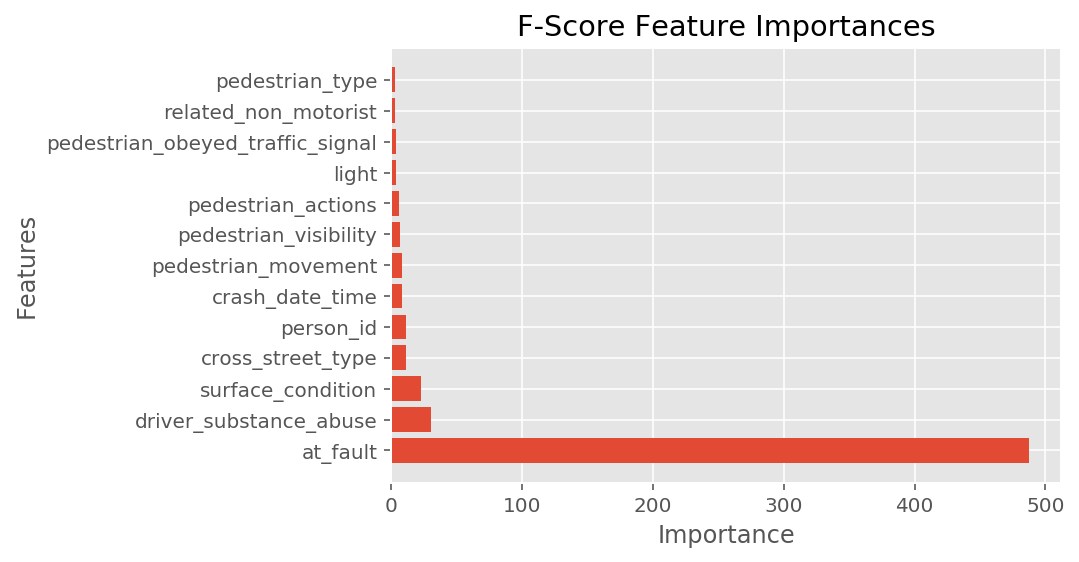

In [66]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

## Multi Class Classification Using Naive Bayes
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [67]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [68]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(Data3, target3, random_state = 0) 

In [69]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

#### Classification Report

In [70]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.99      0.98      0.98       221
           2       1.00      0.84      0.91        19

    accuracy                           0.96       251
   macro avg       0.85      0.88      0.85       251
weighted avg       0.97      0.96      0.96       251



#### Confusion Matrix

In [71]:
print(confusion_matrix(y_test,gnb_predictions))  

[[  9   2   0]
 [  5 216   0]
 [  2   1  16]]


In [72]:
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy) 

0.9601593625498008


# DATA STORIES

Data stories explore and explain how and why data changes over time, usually through a series of linked visualizations. 
The dataset used is Crash Reporting Data set. It includes three datasets. Those datasets are about car crashes that have occurred in the Montgomery County, they provide information about the driver, the incident, and the non-motorist. They are from https://www.montgomerycountymd.gov/. The dataMontgomery program seeks to provide residents and constituents with direct access to County datasets in consumable formats, so they may be viewed, sorted and used in various ways, including being potentially leveraged in the development of new applications and services by interested parties. Providing this information offers the public an opportunity to review and analyze raw data, and the opportunity to use it for a variety of purposes. The data within these datasets are structured, handled in a professional and secure manner, and can be trusted because it is owned by the county. They are weekly updated.  As today the incidents dataset  has **66 494 records and 44 attributs**. Each row has at least one missing value (NaN). A list of all the summations of each column (incidentsData.isnull().sum()) shows 12 attributs (out of 44) without missing values. The drivers dataset has **118036 records and 43 attributs**. Only 17 out of 43 attributs have no missing values. The Non Motorists dataset has few records with  **3839 records and 32 attributs**. 12 out of 32 have no missing values. Removing the rows for each null value will greatly size down the datasets resulting in a skewed model. I decided to keep all three datasets and concatenate them for their visualizatons. By bricking down the crash_date_time into variables Day, Month, Year, Hour and Dayofweek , I was able to show through visualizations,  the most dangerous times to be driving. Most accidents tend to occur between 3 pm and 6 pm. 
With other visualizations, the dataset shows the following discoveries: 
* Number of accidents per year<br>
* Number of fatalities per year<br>
* How roadway surface (type) impact crash<br>
* Non motorists (type) involvement in crash<br>
* Type of vehicle involved in crash<br>
There is lack of precision in the number of fatalities, the variable 'acrs_report_type' has value fatal crash without reporting how many. By lack of information about the driver age and gender, I was unable to investigate the following
* The age group that has the highest number of crashes (or fatalities)<br>
* Gender ratio in the crashes<br> 
The difficulties of joining the three datasets without losing substantial information and shirking the data size, I decided that the modeling being done in each dataset. The Multi-class Classification by Decision Tree on the incidents’ dataset and Multi class Classification using Random Forest on Non Motorists dataset.